## Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas

In [1]:
# Imports 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme() 
%matplotlib inline

# 2. Carregando o dataframe SINASC

SINASC - Sistema de Informações de Nascidos Vivos

     
O DATASUS desenvolveu o Sistema de Informações sobre Nascidos Vivos (SINASC) visando reunir informações epidemiológicas referentes aos nascimentos informados em todo território nacional. Sua implantação ocorreu de forma lenta e gradual em todas as Unidades da Federação.     
     
http://www2.datasus.gov.br/DATASUS/index.php?area=060702


In [3]:
# Amostra de Dados
sinasc_raw = pd.read_csv('mod05_sinasc_ro_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
# Info
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# 3.0 GroupBy: Dividir, Aplicar, Combinar (Split, Apply, Combine)

https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

In [5]:
sinasc_1 = sinasc_raw[['ESCMAE', 'IDADEMAE','DTNASC']]
sinasc_1.head()

,ESCMAE,IDADEMAE,DTNASC
0,8 a 11 anos,19,2019-02-19
1,8 a 11 anos,29,2019-02-21
2,8 a 11 anos,37,2019-02-25
3,12 anos ou mais,30,2019-03-20
4,8 a 11 anos,30,2019-03-23


In [6]:
# Média
sinasc_1.mean()

C:\Users\phili\AppData\Local\Temp\ipykernel_14116\4234081004.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sinasc_1.mean()


IDADEMAE    26.093718
dtype: float64

In [6]:
# Verificando a frequência
sinasc_1.ESCMAE.value_counts()

8 a 11 anos        15633
12 anos ou mais     5767
4 a 7 anos          4760
1 a 3 anos           516
Nenhuma               40
Name: ESCMAE, dtype: int64

# 4.0  Estrutura do Groupby

In [7]:
# Objeto do tipo DataFrameGroupby
sinasc_1.groupby('ESCMAE')

In [8]:
# Média 'ESCMAE'
sinasc_1.groupby('ESCMAE').mean()

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000



``` python
df.groupby(by = None, axis = 0, level = None, as_index: bool = True,
           sort: bool = True, group_keys: bool = True,
           squeeze: bool = <object object at 0x00000225ADF7E510>,
           observed: bool = False, dropna: bool = True
) -> 'DataFrameGroupBy'

```

# 5.0 Pivot table

``` python 
sinasc_3.pivot_table(values=None, index=None, columns=None, aggfunc='mean',
                    fill_value=None, margins=False, dropna=True, margins_name='All',
                    observed=False,
) -> 'DataFrame'

```

In [9]:
# Retorna apenas um dataframe e não um datagramegroupby
sinasc_1.pivot_table(index='ESCMAE',
                     aggfunc='mean')

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


# 6.0 Group by DTNASC e contagem da IDADEMAE 

In [10]:
# DTNASC vai ser a chave e a IDADEMAE nossa coluna auxiliar.
sinasc_1[['DTNASC', 'IDADEMAE']]

,DTNASC,IDADEMAE
0,2019-02-19,19
1,2019-02-21,29
2,2019-02-25,37
3,2019-03-20,30
4,2019-03-23,30
...,...,...
27023,2019-12-13,32
27024,2019-10-04,19
27025,2019-08-02,24
27026,2019-12-23,21


##  6.1 Em SQL <a name="sql"></a>

``` sql
SELECT DTNASC, count(IDADEMAE) 
FROM sinasc
GROUP BY DTNASC

```

Estamos selecionando duas colunas DTNASC E IDADEMAE e agrupamento por DTNASC. 
Nossa chave é DTNASC e estamos contando IDADEMAE. 
Então vamos trazer quantas crianças nasceram naquela data de nascimento.

## 6.2 Em excel 
Criamos uma tabela dinâmica e selecionando DTNASC e IDADEMAE. 
Vamos transformar IDADEMAE em contagem.

## 6.3 Python com ``groupby()`` <a name="py_group"></a>

In [11]:
# Contagem com groupby
sinasc_1.groupby('DTNASC') ['IDADEMAE'].count()

DTNASC
2019-01-01    48
2019-01-02    68
2019-01-03    77
2019-01-04    73
2019-01-05    71
              ..
2019-12-27    84
2019-12-28    59
2019-12-29    48
2019-12-30    76
2019-12-31    51
Name: IDADEMAE, Length: 365, dtype: int64

In [13]:
# Transformando em dataframe
sinasc_1.groupby('DTNASC')['IDADEMAE'].count().to_frame()

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


## 6.4 Python com ``pivot_table()`` <a name="py_pivot"></a>

In [14]:
# Contagem com pivot_table
sinasc_1.pivot_table(values = 'IDADEMAE',index = 'DTNASC', aggfunc='count')

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


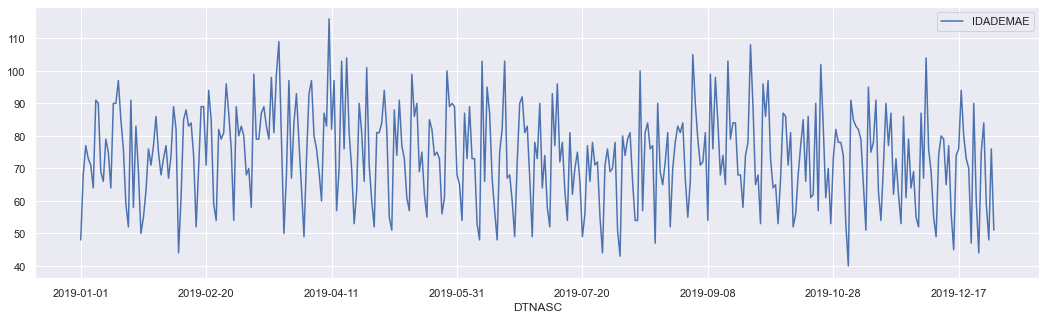

In [14]:
# Visualização ao longo do tempo 
sinasc_1.pivot_table(values = 'IDADEMAE', index = 'DTNASC', aggfunc ='count').plot(figsize=[18,5]);

- A quantidade de crianças nascidas ao longo de 2019
- O mínimo é 40 e o máximo cerca de 115. 
- Temos um comportamente bem parecido ao longo do tempo. 

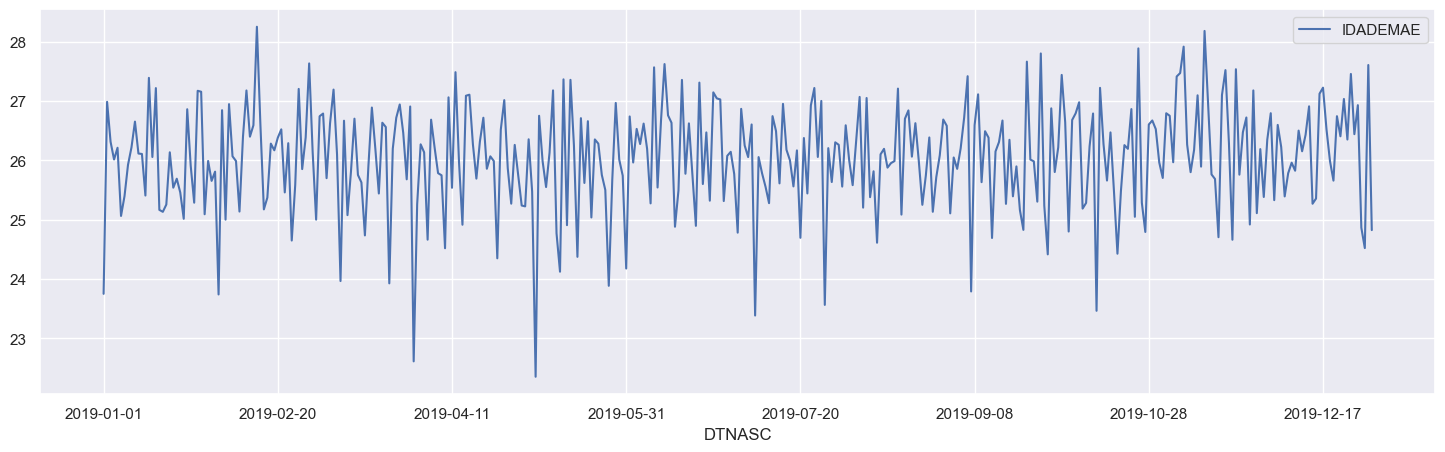

In [15]:
# Avaliando a idade média das mães ao longo do tempo
sinasc_1.pivot_table(values = 'IDADEMAE',index = 'DTNASC', aggfunc='mean').plot(figsize=[18,5]);

In [16]:
# Retorna um dataframe groupby se tiramos a atribuição e passarmos direto.
esc_mae = sinasc_1.groupby('ESCMAE')

In [18]:
# Se além disso selecionarmos uma coluna onde queremos fazer esse agrupamento, ele retorna uma SeriesGroupby.
sinasc_1.groupby('ESCMAE')['IDADEMAE']

In [19]:
# Retorna um DataFrame
sinasc_1.groupby('ESCMAE').count()

,IDADEMAE,DTNASC
ESCMAE,,
1 a 3 anos,516,516
12 anos ou mais,5767,5767
4 a 7 anos,4760,4760
8 a 11 anos,15633,15633
Nenhuma,40,40


In [20]:
# Retorna uma Series
sinasc_1.groupby('ESCMAE')['IDADEMAE'].count()

ESCMAE
1 a 3 anos           516
12 anos ou mais     5767
4 a 7 anos          4760
8 a 11 anos        15633
Nenhuma               40
Name: IDADEMAE, dtype: int64

In [21]:
type(esc_mae)

pandas.core.groupby.generic.DataFrameGroupBy

In [22]:
# A média da idade das mães por essa faixa etária.
esc_mae.mean()

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [23]:
#A contagem da idade da mãe por essas faixas etárias
esc_mae.count()

,IDADEMAE,DTNASC
ESCMAE,,
1 a 3 anos,516,516
12 anos ou mais,5767,5767
4 a 7 anos,4760,4760
8 a 11 anos,15633,15633
Nenhuma,40,40


In [24]:
# A soma das idades das mães por essas faixas etárias
esc_mae.sum()

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263


In [25]:
# Agrupando os anos de estudo da mãe com relação a idade média das mães e a idade mediana do pai
sinasc_2 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI']]
sinasc_2.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [26]:
sinasc_2.shape

(27028, 3)

In [27]:
#Quantos bebês que não tem a idade mãe registrados?
sinasc_2.IDADEMAE.isna().sum()

0

In [28]:
# Quantos bebês não tem a idade do pai registrados?
sinasc_2.IDADEPAI.isna().sum()

19421

In [29]:
# Proporção com a nossa base de dados
19421/27028

0.7185511321592423

In [30]:
# Dropamos aquelas linhas com missing. Esses são os bebês que nascem com a idade do pai registradas
sinasc_2.dropna().shape

(7543, 3)

In [31]:
# Calcular a idade mediana do pai e da mãe para visualizar por faixa de escolaridade da mãe
result = sinasc_2.dropna().groupby('ESCMAE').median()
result

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,29.0,34.0
12 anos ou mais,30.0,32.0
4 a 7 anos,26.0,30.0
8 a 11 anos,25.0,29.0
Nenhuma,31.5,38.5


In [32]:
# Mediana
sinasc_2.groupby('ESCMAE')['IDADEMAE'].median()

ESCMAE
1 a 3 anos         28.0
12 anos ou mais    29.0
4 a 7 anos         24.0
8 a 11 anos        24.0
Nenhuma            33.0
Name: IDADEMAE, dtype: float64

In [33]:
# Calculando a diferença entre a idade do pai com relação a idade da mãe.
result['DIF'] = result['IDADEPAI'] - result['IDADEMAE']
result.sort_values('DIF')

,IDADEMAE,IDADEPAI,DIF
ESCMAE,,,
12 anos ou mais,30.0,32.0,2.0
4 a 7 anos,26.0,30.0,4.0
8 a 11 anos,25.0,29.0,4.0
1 a 3 anos,29.0,34.0,5.0
Nenhuma,31.5,38.5,7.0


# 7.0 Agregações 

Obs: quais funções podemos utilizar dentro do método groupby

O pandas tem alguns métodos otimizados dentro do groupby: 

| Método       | Descrição                               |
|--------------|-----------------------------------------|
| **count()**  | contagem de não *missing*               |
| **sum()**    | soma                                    |
| **mean()**   | média                                   |
| **median()** | mediana                                 |
| **std()**    | desvio padrão amostral                  |
| **var()**    | variancia amostral                      | 
| **min()**    | mínimo                                  |
| **max()**    | máximo                                  |
| **prod()**   | produto                                 |
| **first()**  | primeiro elemento                       |
| **last()**   | último elemento                         |

Além destes, diversos outros métodos do objeto agrupado também funcionam, por exemplo a função ```quantile()```.

In [35]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI'
]].copy()

In [36]:
# Quantos bebês nascem do sexo masculino e do sexo feminino
sinasc.SEXO.value_counts()

Masculino    13886
Feminino     13138
Name: SEXO, dtype: int64

In [37]:
# Quantas datas de nascimento nós temos. Um ano completo práticamente
sinasc.DTNASC.nunique()

365

In [38]:
# Contagem de nascimento por data de nascimento.
sinasc.DTNASC.value_counts() 

2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-12-25     44
2019-02-09     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: DTNASC, Length: 365, dtype: int64

# 8.0 Group by DTNASC e contagem da IDADEMAE 

## 8.1 Em python

In [39]:
# Contagem de nascimento por data de nascimento.
sinasc.groupby('DTNASC')['IDADEMAE'].count()

DTNASC
2019-01-01    48
2019-01-02    68
2019-01-03    77
2019-01-04    73
2019-01-05    71
              ..
2019-12-27    84
2019-12-28    59
2019-12-29    48
2019-12-30    76
2019-12-31    51
Name: IDADEMAE, Length: 365, dtype: int64

In [40]:
# Ordenar os VALORES do maior para o menor
sinasc.groupby('DTNASC')['IDADEMAE'].count().sort_values(ascending=False)

DTNASC
2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-07-28     44
2019-12-25     44
2019-02-09     44
2019-08-04     43
2019-11-03     40
Name: IDADEMAE, Length: 365, dtype: int64

## 8.2 Em SQL


``` sql
SELECT DTNASC, count(IDADEMAE) as contagem
FROM sinasc
GROUP BY DTNASC
ORDER BY contagem DESC
```

# 9.0 Group by DTNASC e média da IDADEMAE

Obs: E se quisermos saber a media da idade da mãe por data de nascimento?

## 9.1 Em SQL <a name="med_sql"></a>

``` sql
SELECT DTNASC, AVG(IDADEMAE)
FROM sinasc
GROUP BY DTNASC
```

## 5.2 Em python

In [41]:
# A média por data de nascimento
sinasc.groupby('DTNASC')['IDADEMAE'].mean()

DTNASC
2019-01-01    23.750000
2019-01-02    26.985294
2019-01-03    26.311688
2019-01-04    26.013699
2019-01-05    26.211268
                ...    
2019-12-27    26.928571
2019-12-28    24.864407
2019-12-29    24.520833
2019-12-30    27.605263
2019-12-31    24.823529
Name: IDADEMAE, Length: 365, dtype: float64

In [42]:
# sort=false, não ordena
sinasc.groupby('DTNASC', sort=False)['IDADEMAE'].mean()

DTNASC
2019-02-19    26.168539
2019-02-21    26.521277
2019-02-25    25.585366
2019-03-20    26.191919
2019-03-23    26.560000
                ...    
2019-12-31    24.823529
2019-12-15    25.355556
2019-12-21    26.742857
2019-12-22    26.404255
2019-12-28    24.864407
Name: IDADEMAE, Length: 365, dtype: float64

In [43]:
# Ordenar por valores decrescentes
sinasc.groupby('DTNASC')['IDADEMAE'].mean().sort_values(ascending=False)

DTNASC
2019-02-14    28.250000
2019-11-13    28.179487
2019-11-07    27.914634
2019-10-25    27.885246
2019-09-27    27.800000
                ...    
2019-07-27    23.563636
2019-10-13    23.464286
2019-07-07    23.384615
2019-03-31    22.612245
2019-05-05    22.352941
Name: IDADEMAE, Length: 365, dtype: float64

In [44]:
# Somando a idade das mães ao longo do ano
sinasc.groupby('DTNASC')['IDADEMAE'].sum()

DTNASC
2019-01-01    1140
2019-01-02    1835
2019-01-03    2026
2019-01-04    1899
2019-01-05    1861
              ... 
2019-12-27    2262
2019-12-28    1467
2019-12-29    1177
2019-12-30    2098
2019-12-31    1266
Name: IDADEMAE, Length: 365, dtype: int64

## Plotando IDADEMAE média ao longo do tempo

In [45]:
resultado = sinasc.groupby('DTNASC')['IDADEMAE'].mean()
resultado

DTNASC
2019-01-01    23.750000
2019-01-02    26.985294
2019-01-03    26.311688
2019-01-04    26.013699
2019-01-05    26.211268
                ...    
2019-12-27    26.928571
2019-12-28    24.864407
2019-12-29    24.520833
2019-12-30    27.605263
2019-12-31    24.823529
Name: IDADEMAE, Length: 365, dtype: float64

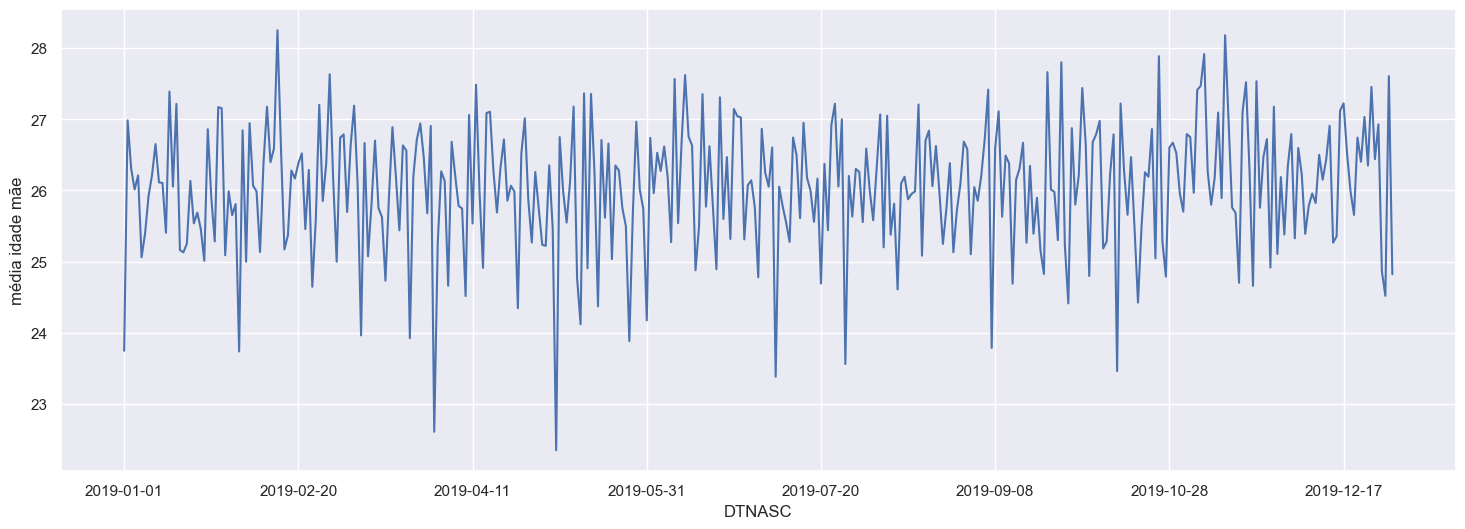

In [46]:
resultado.plot(figsize=[18, 6])
plt.ylabel('média idade mãe');

- A idade da mãe varia entre 25 e 27, com alguns outliers

# 10.0 Exemplos

## 10.1 Quantidade de bebês ao longo do ano

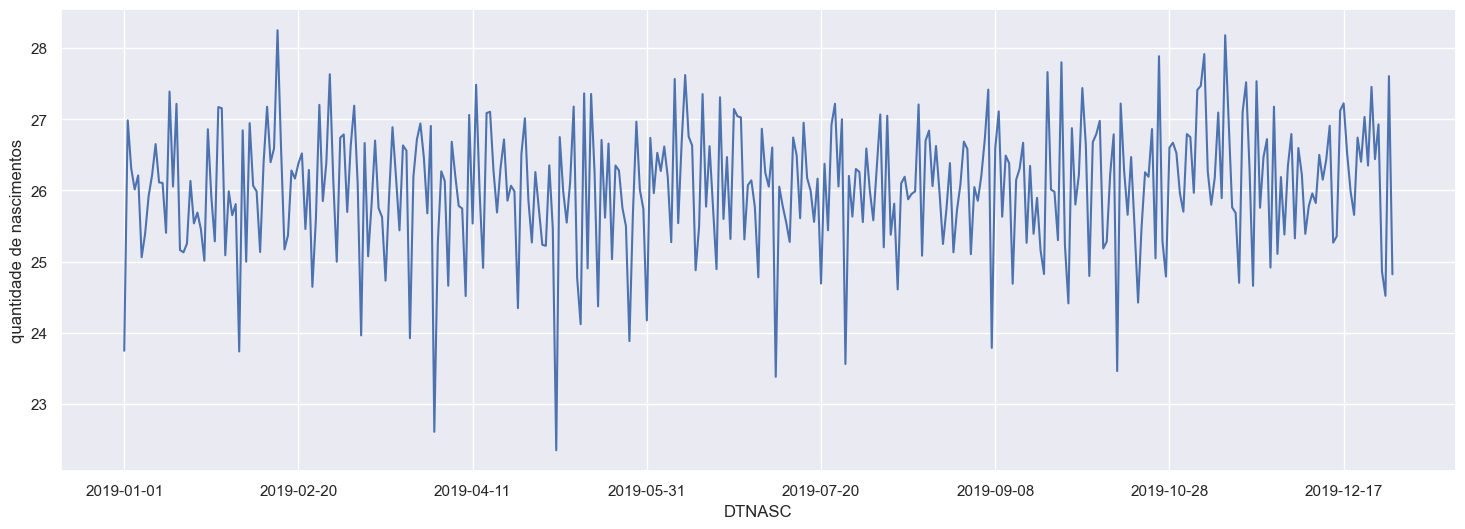

In [47]:
resultado.plot(figsize=[18,6])
plt.ylabel('quantidade de nascimentos');

## 6.2 Quantidade de bebês fem e masc ao longo do ano

In [48]:
# Queremos ver nesse mesmo gráfico a quantidade do sexo feminino e masculino
sinasc['SEXO'].value_counts()

Masculino    13886
Feminino     13138
Name: SEXO, dtype: int64

In [49]:
# Filtrar quem é do sexo feminino
sinasc[sinasc['SEXO'] == 'Feminino']

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0
6,37,Feminino,9.0,10.0,3158,4,2019-04-01,37 a 41 semanas,Única,8 a 11 anos,42.0
...,...,...,...,...,...,...,...,...,...,...,...
27012,36,Feminino,9.0,9.0,1990,4,2019-08-22,32 a 36 semanas,Única,12 anos ou mais,NaN
27013,31,Feminino,8.0,9.0,1980,4,2019-09-06,32 a 36 semanas,Única,12 anos ou mais,30.0
27016,29,Feminino,9.0,9.0,2190,4,2019-10-13,32 a 36 semanas,Única,12 anos ou mais,NaN
27018,36,Feminino,8.0,8.0,2800,4,2019-10-24,37 a 41 semanas,Única,12 anos ou mais,NaN


In [50]:
# Contar quantos bebês do sexo feminino nasceram por dia
fem = sinasc[sinasc['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()
fem

DTNASC
2019-01-01    20
2019-01-02    31
2019-01-03    30
2019-01-04    32
2019-01-05    30
              ..
2019-12-27    37
2019-12-28    31
2019-12-29    20
2019-12-30    34
2019-12-31    17
Name: IDADEMAE, Length: 365, dtype: int64

In [51]:
# Contar quantos bebês do sexo masculino nasceram por dia
masc = sinasc[sinasc['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADEMAE'].count()

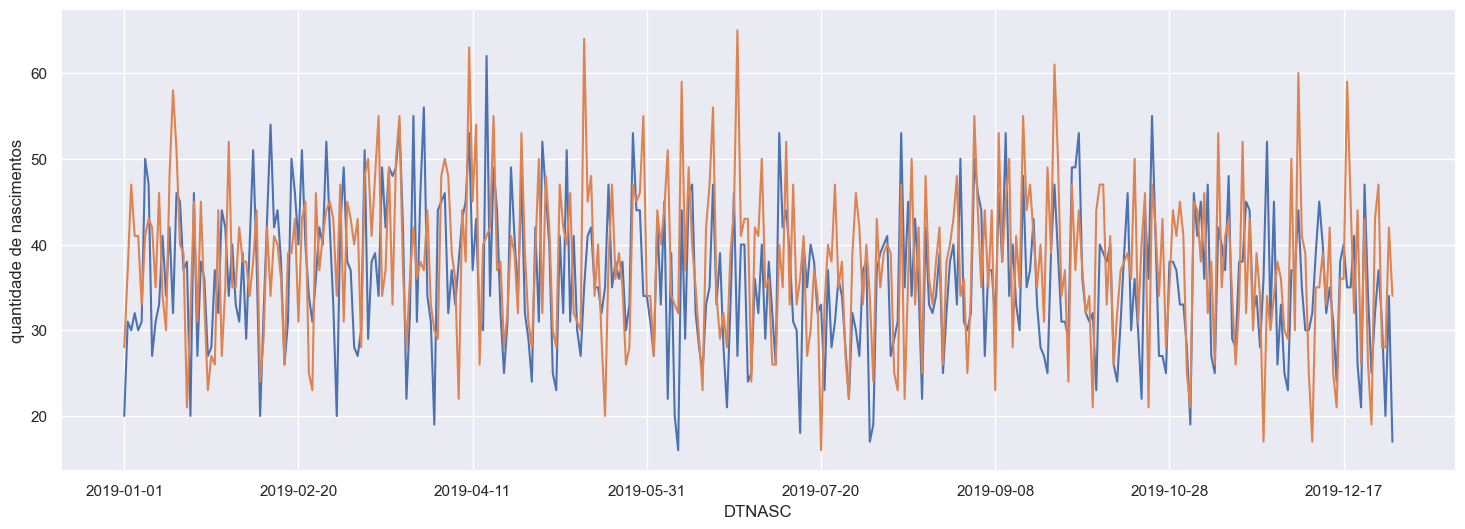

In [52]:
# Plot dos dois sexos.
fem.plot(figsize=[18,6])
masc.plot()
plt.ylabel('quantidade de nascimentos');

## 10.3 Quantidade de bebês por dia da semana

### Mudando o índice para DTNASC 

In [53]:
# Transformando DTNASC que é do tipo Object no tipo datetime.
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])
sinasc.dtypes

IDADEMAE              int64
SEXO                 object
APGAR1              float64
APGAR5              float64
PESO                  int64
CONSULTAS             int64
DTNASC       datetime64[ns]
GESTACAO             object
GRAVIDEZ             object
ESCMAE               object
IDADEPAI            float64
dtype: object

In [54]:
# Outra forma de faze essa transformação
sinasc.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])

In [55]:
# Setando a coluna DTNAS como index para calcular o dayofweek
sinasc.set_index('DTNASC', inplace=True)

### Criando variável dia da semana de nascimento

In [56]:
sinasc.index

DatetimeIndex(['2019-02-19', '2019-02-21', '2019-02-25', '2019-03-20',
               '2019-03-23', '2019-03-27', '2019-04-01', '2019-04-01',
               '2019-02-28', '2019-03-11',
               ...
               '2019-10-24', '2019-11-09', '2019-11-09', '2019-11-20',
               '2019-11-21', '2019-12-13', '2019-10-04', '2019-08-02',
               '2019-12-23', '2019-12-27'],
              dtype='datetime64[ns]', name='DTNASC', length=27028, freq=None)

In [57]:
sinasc.index.dayofweek

Int64Index([1, 3, 0, 2, 5, 2, 0, 0, 3, 0,
            ...
            3, 5, 5, 2, 3, 4, 4, 4, 0, 4],
           dtype='int64', name='DTNASC', length=27028)

In [58]:
# Qual é o dia da semana para cada data de nascimento
# Monday=0, Sunday=6.
sinasc['DIADASEMANA'] = sinasc.index.dayofweek

In [59]:
sinasc['DIADASEMANA'].value_counts()

0    4493
2    4413
3    4138
1    4024
4    3855
5    3183
6    2922
Name: DIADASEMANA, dtype: int64

In [60]:
# Agrupando por DIADASEMANA e contando a IDADEMAE(contando a qtd de linha)
sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()

DIADASEMANA
0    4493
1    4024
2    4413
3    4138
4    3855
5    3183
6    2922
Name: IDADEMAE, dtype: int64

In [61]:
result = sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()

In [62]:
result.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='DIADASEMANA')

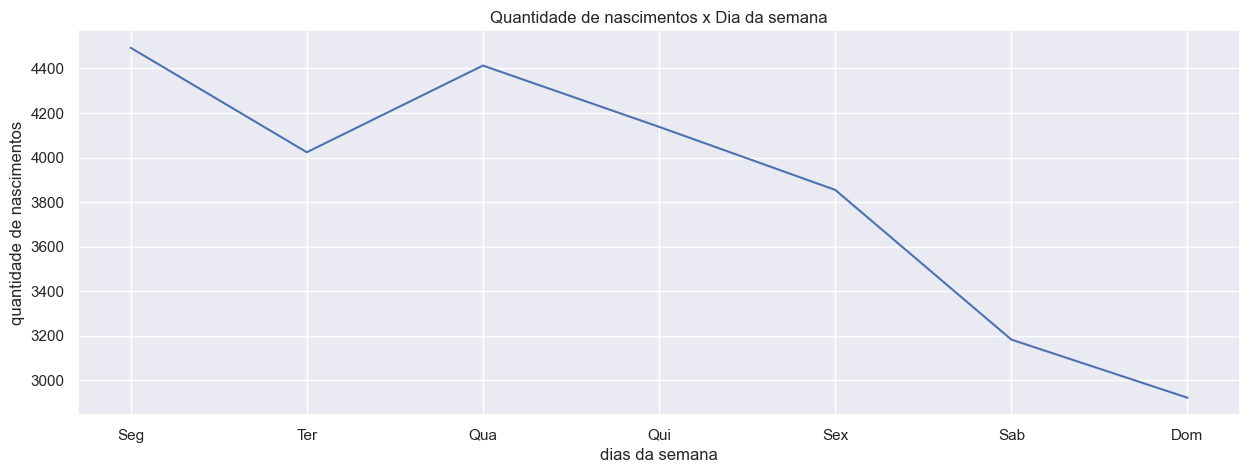

In [63]:
fig, ax = plt.subplots(figsize=[15,5])
result.plot()
ax.set_xticks(result.index)
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']) #renomeando os índices
plt.title('Quantidade de nascimentos x Dia da semana')
plt.xlabel('dias da semana')
plt.ylabel('quantidade de nascimentos');

- A maioria dos bebês nasceram de segunda a quarta
- No ínicio da semana nascem muito mais crianças do que no final de semana por exemplo.

## 10.4 Quantidade de bebês fem e masc ao longo do tempo usando unstack

In [64]:
# Conseguimos fazer um groupby passando duas colunas como chaves. Agrupe por data de nascimento e sexo
sinasc.groupby(['DTNASC', 'SEXO']).count()

IDADEMAE  APGAR1  APGAR5  PESO  CONSULTAS  GESTACAO  \
DTNASC     SEXO                                                             
2019-01-01 Feminino         20      20      20    20         20        19   
           Masculino        28      28      28    28         28        26   
2019-01-02 Feminino         31      30      30    31         31        29   
           Masculino        37      36      36    37         37        36   
2019-01-03 Feminino         30      30      30    30         30        28   
...                        ...     ...     ...   ...        ...       ...   
2019-12-29 Masculino        28      28      28    28         28        27   
2019-12-30 Feminino         34      33      34    34         34        33   
           Masculino        42      42      42    42         42        39   
2019-12-31 Feminino         17      17      17    17         17        15   
           Masculino        34      34      34    34         34        33   

                      GRAVIDEZ  ESCMAE  IDADEPAI  DIADASEMANA  
DTNASC     SEXO                                                
2019-01-01 Feminino         20      20         5           20  
           Masculino        28      28         7           28  
2019-01-02 Feminino         31      30         8           31  
           Masculino        37      36         9           37  
2019-01-03 Feminino         30      30         8           30  
...                        ...     ...       ...          ...  
2019-12-29 Masculino        28      28         8           28  
2019-12-30 Feminino         33      31         9           34  
           Masculino        42      41        13           42  
2019-12-31 Feminino         17      17         5           17  
           Masculino        34      34         6           34  

[730 rows x 10 columns]

In [65]:
# Me traga apenas a coluna 'IDADEMAE'
sinasc.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count()

DTNASC      SEXO     
2019-01-01  Feminino     20
            Masculino    28
2019-01-02  Feminino     31
            Masculino    37
2019-01-03  Feminino     30
                         ..
2019-12-29  Masculino    28
2019-12-30  Feminino     34
            Masculino    42
2019-12-31  Feminino     17
            Masculino    34
Name: IDADEMAE, Length: 730, dtype: int64

In [66]:
# O primeiro nível do nosso índice vira coluna
sinasc.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count().unstack()

SEXO,Feminino,Masculino
DTNASC,,
2019-01-01,20,28
2019-01-02,31,37
2019-01-03,30,47
2019-01-04,32,41
2019-01-05,30,41
...,...,...
2019-12-27,37,47
2019-12-28,31,28
2019-12-29,20,28


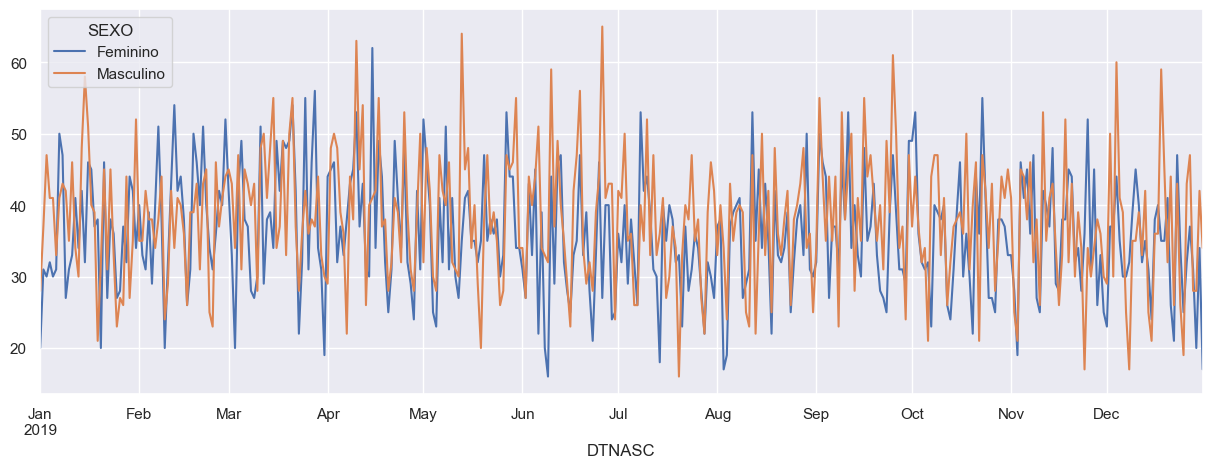

In [67]:
# Com o unstack o primeiro nível do nosso índice vira coluna. 
# Obtemos um dataframe onde cada dia em uma linha e a contagem do gênero
sinasc.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count().unstack().plot(figsize=[15,5]);

## 10.5 Média peso dos bebês fem e masc

In [68]:
# Peso médio na data x, do sexo y
sinasc.groupby(['DTNASC', 'SEXO'])['PESO'].mean()

DTNASC      SEXO     
2019-01-01  Feminino     3280.000000
            Masculino    3093.392857
2019-01-02  Feminino     3219.225806
            Masculino    3347.027027
2019-01-03  Feminino     3254.066667
                            ...     
2019-12-29  Masculino    3121.035714
2019-12-30  Feminino     3217.441176
            Masculino    3305.214286
2019-12-31  Feminino     3223.941176
            Masculino    3381.382353
Name: PESO, Length: 730, dtype: float64

In [69]:
sinasc.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
DTNASC,,
2019-01-01,3280.000000,3093.392857
2019-01-02,3219.225806,3347.027027
2019-01-03,3254.066667,3231.042553
2019-01-04,3096.250000,3335.682927
2019-01-05,3288.366667,3223.902439
...,...,...
2019-12-27,3299.594595,3218.617021
2019-12-28,3204.354839,3294.928571
2019-12-29,3251.000000,3121.035714


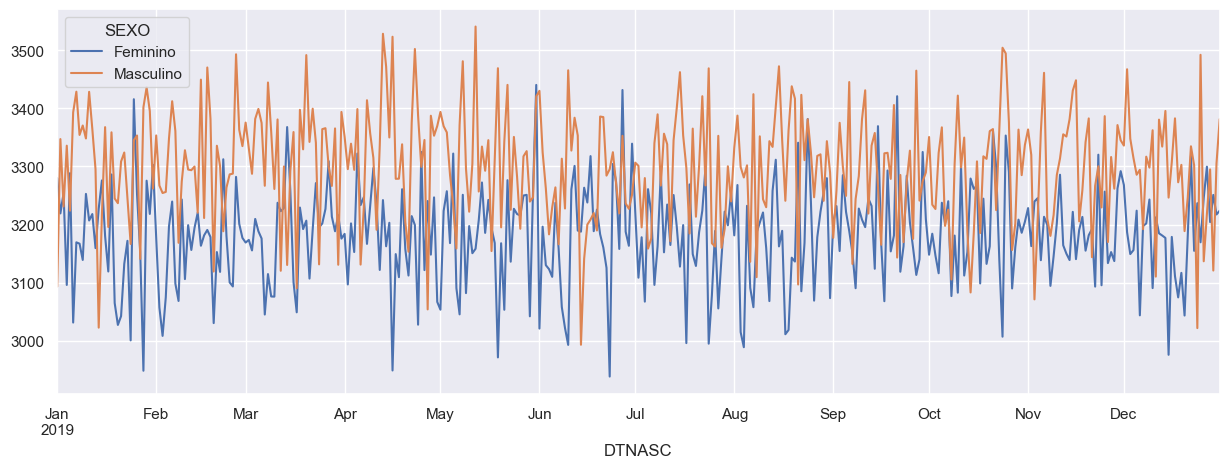

In [70]:
sinasc.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

- Os bebês do sexo masculino parece nascer mais pesados

## 10.6 Peso do bebê x Escolaridade mãe (ESCMAE) 

In [71]:
# As mães que mais estudam tem bebês mais pesados?
sinasc.groupby(['ESCMAE'])['PESO'].median()

ESCMAE
1 a 3 anos         3227.5
12 anos ou mais    3275.0
4 a 7 anos         3265.0
8 a 11 anos        3275.0
Nenhuma            3120.0
Name: PESO, dtype: float64

<AxesSubplot:xlabel='ESCMAE'>

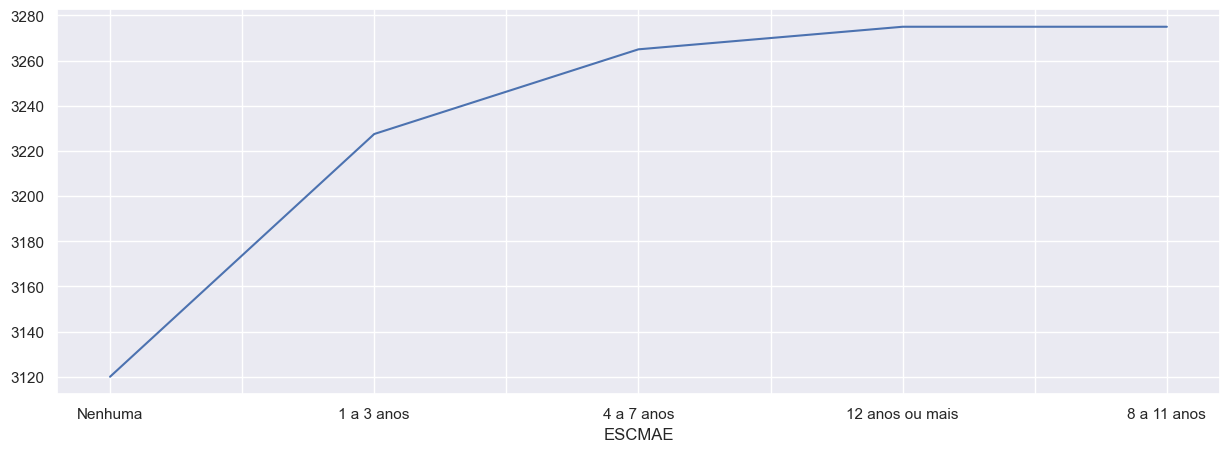

In [72]:
# Correlação
sinasc.groupby(['ESCMAE'])['PESO'].median().sort_values().plot(figsize=[15,5])

- Existe uma correlação entre essas variáveis

In [73]:
sinasc.columns

Index(['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'GESTACAO',
       'GRAVIDEZ', 'ESCMAE', 'IDADEPAI', 'DIADASEMANA'],
      dtype='object')

## 10.7 Gestacão x Escala APGAR

https://pt.wikipedia.org/wiki/Escala_de_Apgar

In [74]:
# Quanto menor o tempo de gestação menor o APGAR da crianca? Com uma saúde inferior?
sinasc.groupby('GESTACAO')['APGAR1'].mean() #APGAR por gestação

GESTACAO
22 a 27 semanas        5.369048
28 a 31 semanas        6.604938
32 a 36 semanas        7.820949
37 a 41 semanas        8.191114
42 semanas e mais      8.120516
Menos de 22 semanas    5.857143
Name: APGAR1, dtype: float64

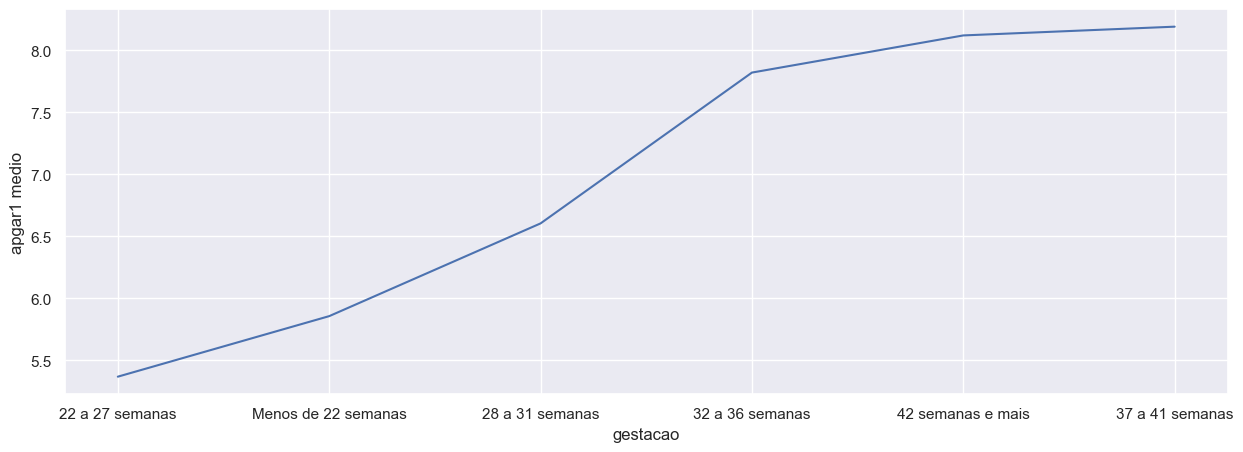

In [75]:
sinasc.groupby('GESTACAO')['APGAR1'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('apgar1 medio')
plt.xlabel('gestacao');

- Crianças que nascem de 22 a 27 semanas possuem um APGAR médio abaixo de 5.5
- Sim temos uma correlação

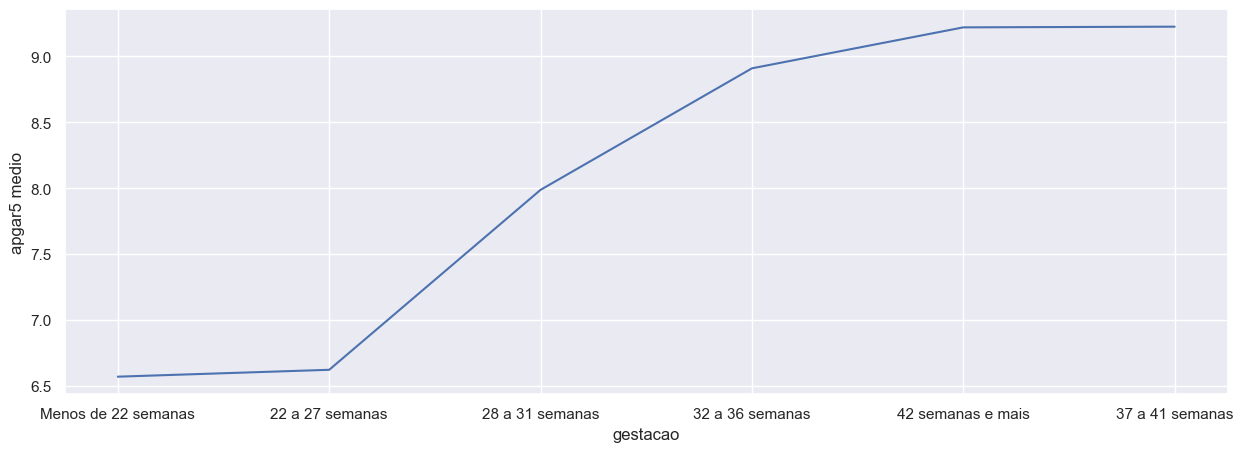

In [76]:
sinasc.groupby('GESTACAO')['APGAR5'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('apgar5 medio')
plt.xlabel('gestacao');

- Sim, se mantém. Os bebês que nascem com menos de 22 semanas nascem com apgar muito baixo, abaixo de 6.5
- Quanto maior o tempo de gestãção melhor o APGAR